- - - -
# Mechpy Tutorials
a mechanical engineering toolbox

source code - https://github.com/nagordon/mechpy  
documentation - https://nagordon.github.io/mechpy/web/  

- - - -

Neal Gordon  
2017-02-20  

- - - -

## material testing analysis 

This quick tutorial shows some simple scripts for analyzing material test data

## Python Initilaization with module imports

In [7]:
# setup 
import numpy as np
import sympy as sp
import pandas as pd
import scipy
from pprint import pprint
sp.init_printing(use_latex='mathjax')

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 8)  # (width, height)
plt.rcParams['font.size'] = 14
plt.rcParams['legend.fontsize'] = 16
from matplotlib import patches

get_ipython().magic('matplotlib')  # seperate window
get_ipython().magic('matplotlib inline') # inline plotting

Using matplotlib backend: Qt4Agg


## Reading raw test data example 1

This example shows how to read multiple csv files and plot them together

In [4]:
import glob as gb
from matplotlib.pyplot import *
%matplotlib inline

csvdir='./examples/'

In [ ]:
e=[]
y=[]

for s in specimen:
    files = gb.glob(csvdir + '*.csv')  # select all csv files
    fig, ax = subplots()
    title(s)
    Pult = []
    
    for f in files:
        d1 = pd.read_csv(f, skiprows=1)
        d1 = d1[1:]  # remove first row of string
        d1.columns = ['t', 'load', 'ext']  # rename columns
        d1.head()
        # remove commas in data
        for d in d1.columns:
            #d1.dtypes
            d1[d] = d1[d].map(lambda x: float(str(x).replace(',','')))
        Pult.append(np.max(d1.load))
        plot(d1.ext, d1.load)   
        ylabel('Pult, lbs')
        xlabel('extension, in')
        
        
    e.append(np.std(Pult))
    y.append(np.average(Pult)     )
    show()


# bar chart 
barwidth = 0.35       # the width of the bars

fig, ax = subplots()
x = np.arange(len(specimen))
ax.bar(x,  y, width=barwidth, yerr=e)

#ax.set_xticks(x)
xticks(x+barwidth/2, specimen, rotation='vertical')
title('Pult with sample average and stdev of n=3')
ylabel('Pult, lbs')
margins(0.05)
show()

## Reading test data - example 2

This example shows how to read a different format of data and plot

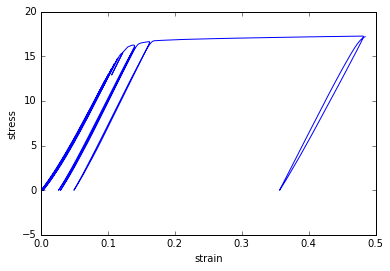

In [8]:
f = 'Aluminum_loops.txt'
d1 = pd.read_csv(f, skiprows=4,delimiter='\t')
d1 = d1[1:]  # remove first row of string
d1.columns = ['time', 'load', 'cross','ext','strain','stress']  # rename columns
d1.head()
# remove commas in data
for d in d1.columns:
    #d1.dtypes
    d1[d] = d1[d].map(lambda x: float(str(x).replace(',','')))
plot(d1.ext, d1.load)   
ylabel('stress')
xlabel('strain')

In [10]:
d1.head()

,time,load,cross,ext,strain,stress
1,0.124,-0.009699,0.001906,0.000047,0.000002,-0.000157
2,0.224,0.063070,0.006730,0.000826,0.000032,0.001023
3,0.324,0.141036,0.011673,0.001650,0.000065,0.002288
4,0.424,0.222520,0.016736,0.002506,0.000098,0.003611
5,0.524,0.302994,0.021679,0.003338,0.000131,0.004916


## another example of plotting data

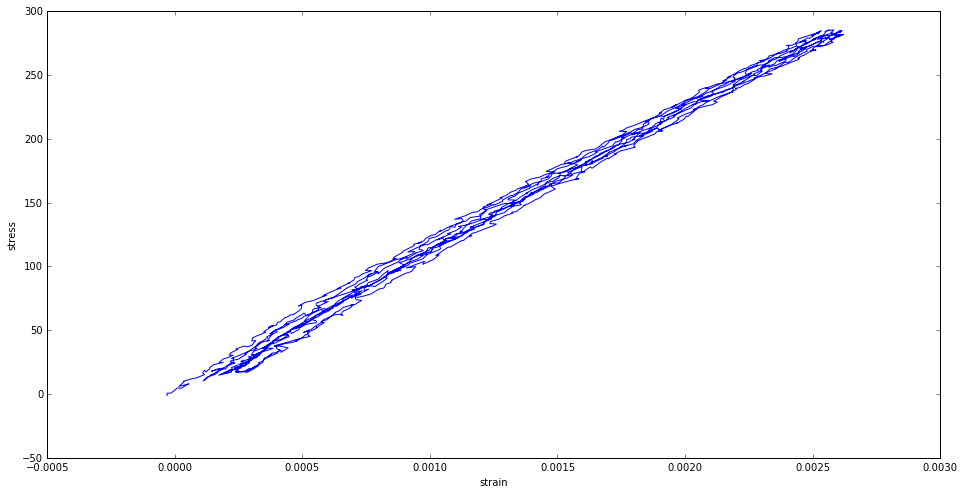

In [81]:
f = 'al_MTS_test.csv'
d1 = pd.read_csv(f, skiprows=3,delimiter=',')
d1 = d1[1:]  # remove first row of string
d1 = d1[['Time','Axial Force', 'Axial Fine Displacement', 'Axial Length']]
d1.columns = ['time', 'load', 'strain','cross']  # rename columns
# remove commas in data
for d in d1.columns:
    #d1.dtypes
    d1[d] = d1[d].map(lambda x: float(str(x).replace(',','')))
plot(d1.strain, d1.load)   
ylabel('stress')
xlabel('strain')

## Finding the "first" peak and delta-10 threshhold limit on force-displacement data of an aluminum coupon

 http://nbviewer.jupyter.org/github/demotu/BMC/blob/master/notebooks/DataFiltering.ipynb

number of data points = 42124


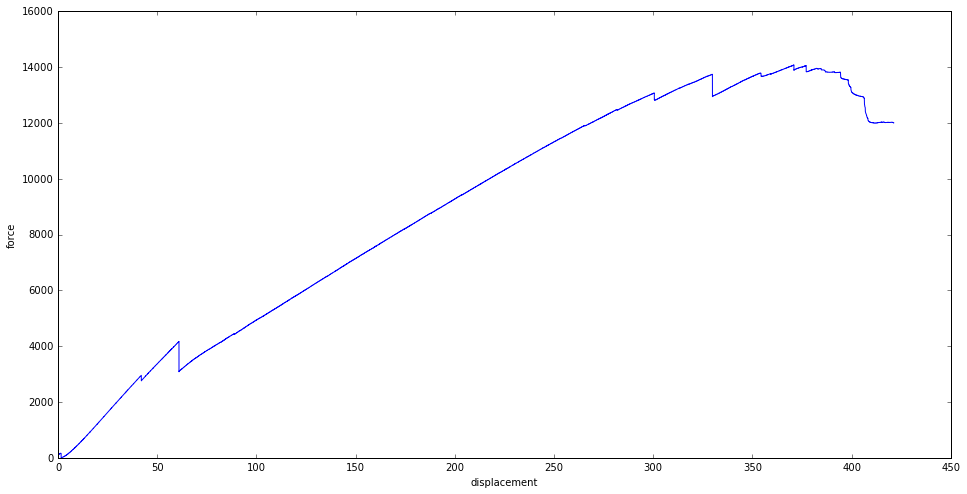

In [11]:

%matplotlib inline
from scipy import signal
from pylab import plot, xlabel, ylabel, title, rcParams, figure
import numpy as np
pltwidth = 16
pltheight = 8
rcParams['figure.figsize'] = (pltwidth, pltheight)

csv = np.genfromtxt('./stress_strain1.csv', delimiter=",")
disp = csv[:,0]
force = csv[:,1]
print('number of data points = %i' % len(disp))

def moving_average(x, window):
    """Moving average of 'x' with window size 'window'."""
    y = np.empty(len(x)-window+1)
    for i in range(len(y)):
        y[i] = np.sum(x[i:i+window])/window
    return y

plt1 = plot(disp, force);
xlabel('displacement');
ylabel('force');


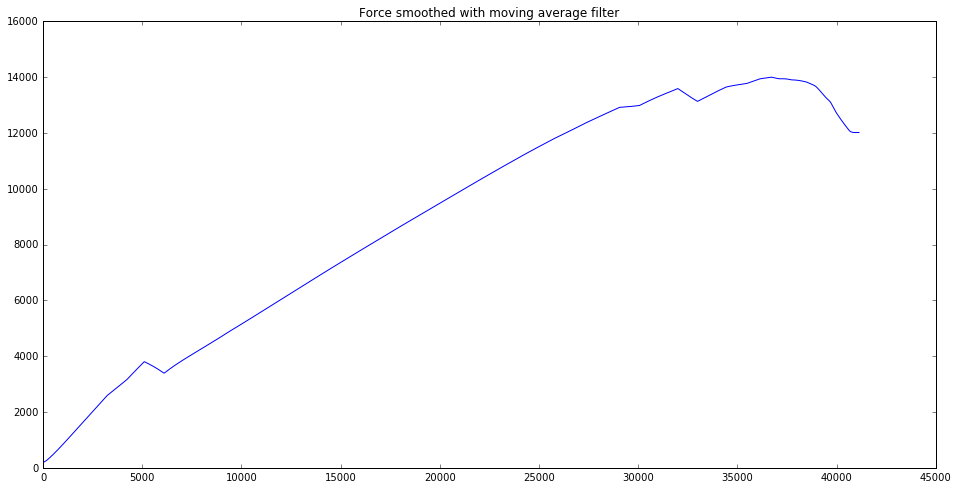

In [12]:
figure()
mywindow = 1000  # the larger the filter window, the more agressive the filtering
force2 = moving_average(force, mywindow)
x2 = range(len(force2))
plot(x2,  force2);
title('Force smoothed with moving average filter');

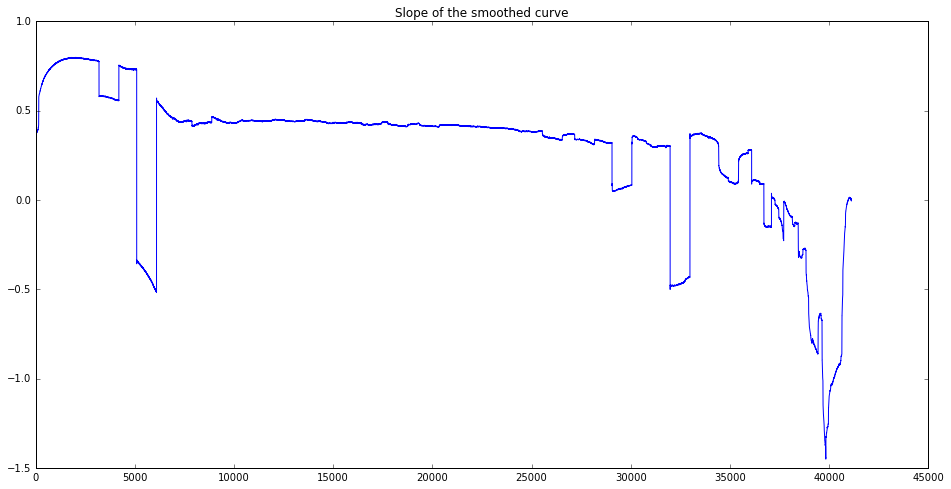

In [13]:

# Find f' using diff to find the first intersection of the 0

# mvavgforce = mvavgforce[:len(mvavgforce)/2]
force2p = np.diff(force2)
x2p = range(len(force2p))
plot(x2p, force2p);
title('Slope of the smoothed curve')

In [14]:
i = np.argmax(force2p<0)     
### or
# i = where(force2p<0)[0][0]
#### or
# for i, f in enumerate(force2p):
#     if f < 0:
#         break

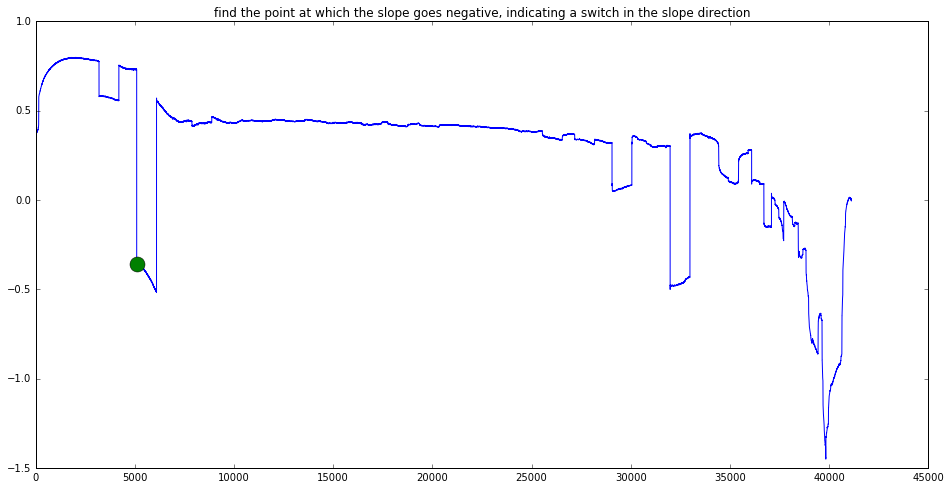

In [15]:
plot(x2p,  force2p, i,force2p[i],'o', markersize=15);
title('find the point at which the slope goes negative, indicating a switch in the slope direction');

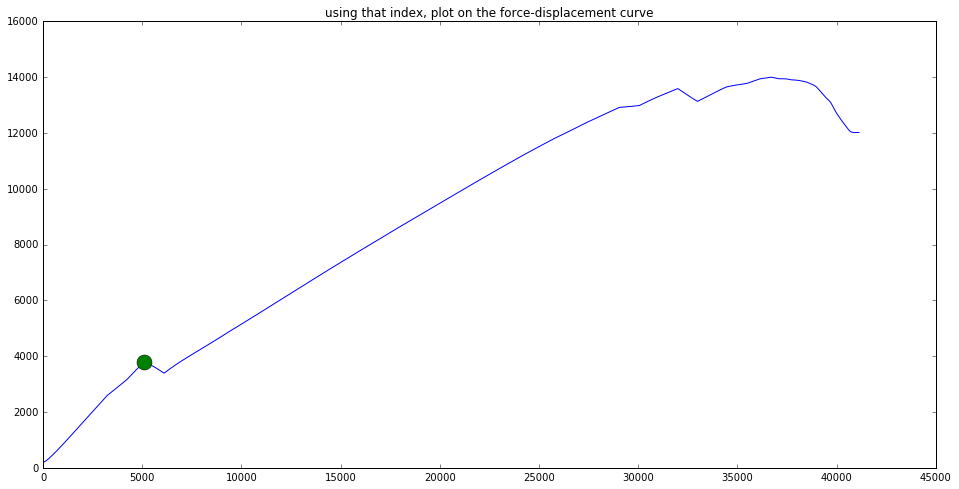

In [16]:
plot(x2,  force2, i,force2[i],'o',markersize=15);
title('using that index, plot on the force-displacement curve');

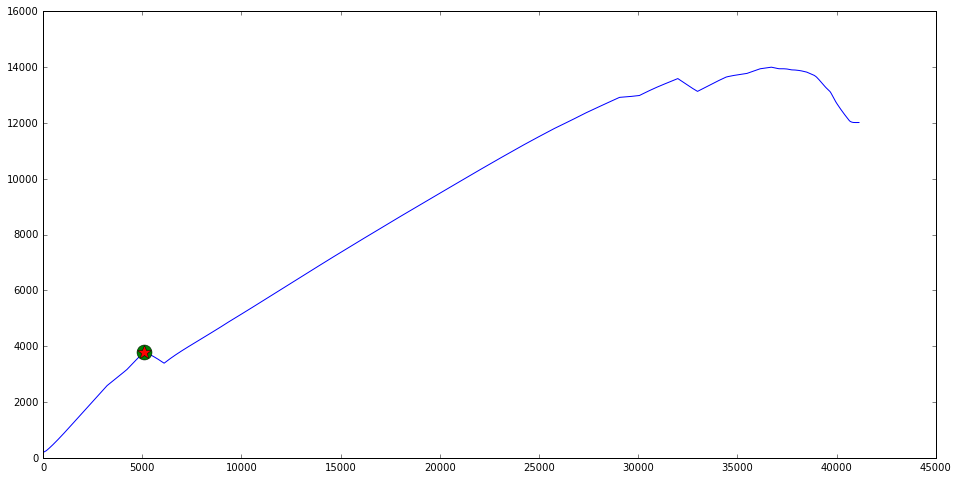

In [17]:
#Now, we need to find the next point from here that is 10 less.
delta = 1

i2 = np.argmax(force2[i]-delta > force2[i:])

# If that point does not exist on the immediate downward sloping path, 
#then just choose the max point. In this case, 10 would exist very 
#far away from the point and not be desireable
if i2 > i:
    i2=0
plot(x2,  force2, i,force2[i],'o', i2+i, force2[i2+i] ,'*', markersize=15);

In [42]:
disp

array([  0.00000000e+00,   9.99999000e-03,   1.99999810e-02, ...,
         4.21189994e+02,   4.21200003e+02,   4.21210013e+02])

## Modulus

In [39]:
# remove nan 
disp = disp[~np.isnan(force)]
force = force[~np.isnan(force)]

In [52]:
A = 0.1 # area
stress = force/A / 1e3
strain = disp/25.4 * 1e-3

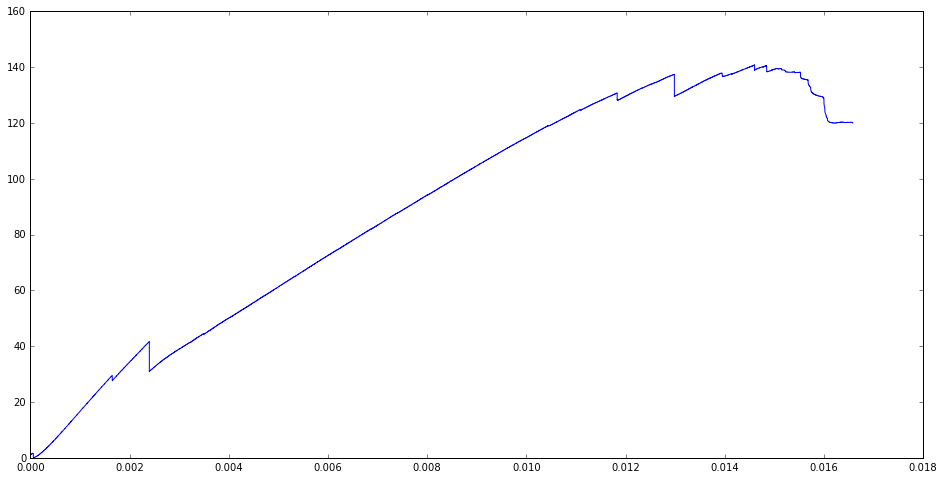

In [53]:
plt.plot(strain, stress)

In [115]:
stress_range = np.array([5, 15])
PL = 0.0005
E_tan = stress/strain

In [116]:
assert(len(stress)==len(strain))

In [117]:
i = (stress > stress_range[0])  &   (stress < stress_range[1])

stress_mod = stress[i]
strain_mod = strain[i]

In [118]:
fit = np.polyfit(strain_mod,stress_mod,1)
fit_fn = np.poly1d(fit) 
fit_fn

poly1d([  1.97261266e+04,  -3.22210726e+00])

In [119]:
PLi = np.argmax( (stress - (fit_fn(strain-PL)) < 0) )   
PLi

6095

(0, 140.7839)

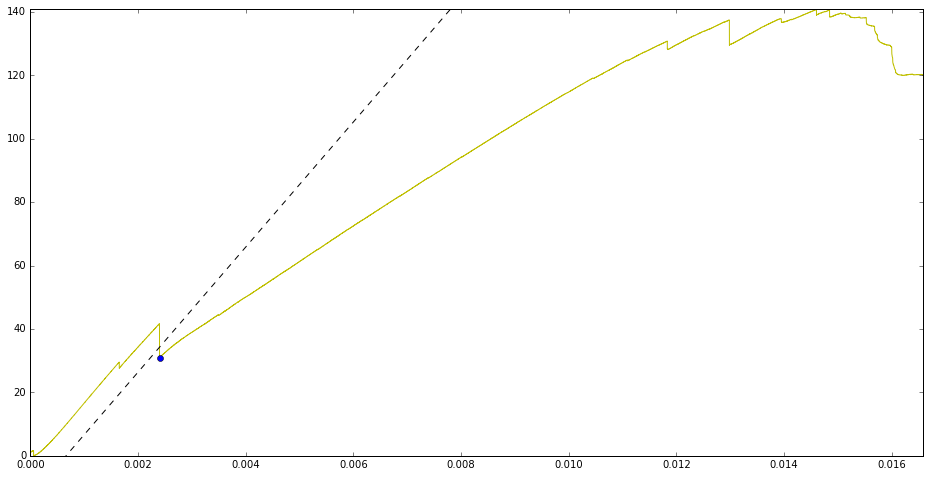

In [124]:
# fit_fn is now a function which takes in x and returns an estimate for y
#plt.text(4,4,fit_fn)
plt.plot(strain ,stress, 'y')
plot(strain, fit_fn(strain-PL) , '--k', strain[PLi], stress[PLi],'o')
plt.xlim(0, np.max(strain))
plt.ylim(0, np.max(stress))

In [121]:
print('ultimate stress %f' % np.max(stress))
print('ultimate strain %f' % np.max(strain))

print('strain proportion limit %f' % strain[PLi])
print('stress proportion limit %f' % stress[PLi])

ultimate stress 140.783900
ultimate strain 0.016583
strain proportion limit 0.002400
stress proportion limit 30.838765


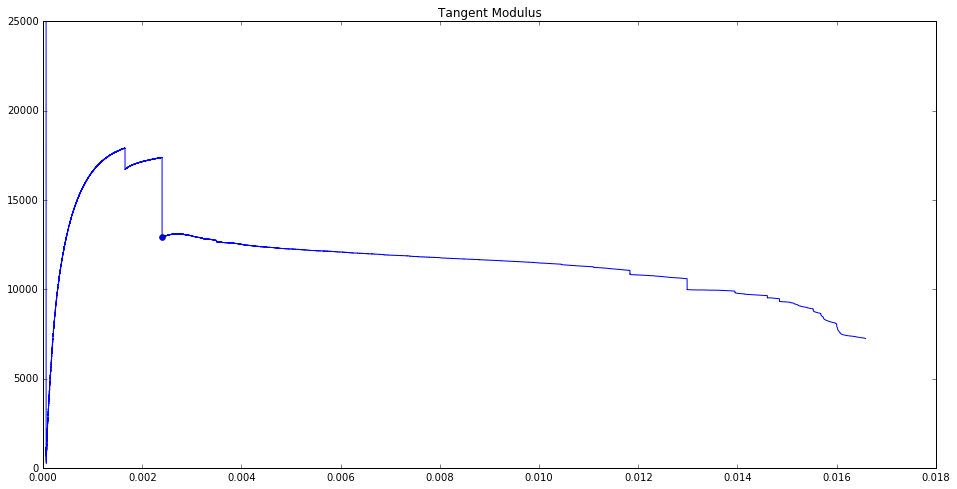

In [127]:
E_tan = E_tan[~np.isinf(E_tan)]
strainE = strain[1:]
plot(strainE, E_tan,'b',  strainE[PLi], E_tan[PLi],'o')
plt.ylim([0,25000])
plt.title('Tangent Modulus')